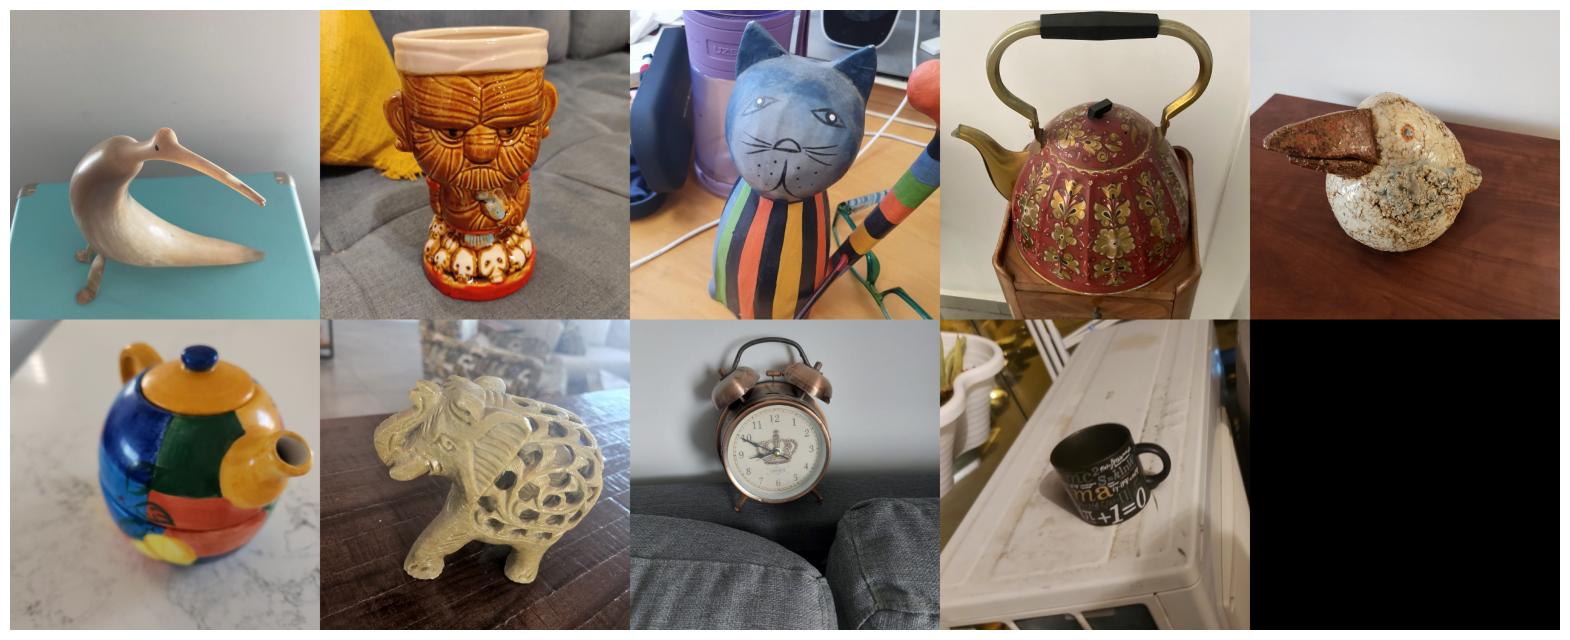

In [ ]:
import os  
import cv2  
import random  
import numpy as np  
import matplotlib.pyplot as plt  

from tools.format_images import center_crop, resize  

target_dir = "/home/jack/Code/Research/textual_inversion_data"
# target_dir = "/home/jack/Code/Research/dreambooth/dataset"
# target_dir = "/home/jack/Code/Research/instree_main/datasets"

final_images = []  
for concept in os.listdir(target_dir):  
    if not os.path.isdir(os.path.join(target_dir, concept)):  
        continue  

    image_path = os.path.join(target_dir, concept)  
    filename = random.choice(os.listdir(image_path))  
    image = cv2.imread(os.path.join(image_path, filename))  
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    image = center_crop(image)  
    image = resize(image)  
    final_images.append(image)  

k = 5
if len(final_images) == 0:
    print("No images found!")
else:
    img_h, img_w, img_c = final_images[0].shape  # 獲取圖片尺寸
    black_img = np.zeros((img_h, img_w, img_c), dtype=np.uint8)  # 黑色圖片  

    rows = []
    for i in range(0, len(final_images), k):
        row_images = final_images[i:i+k]
        while len(row_images) < k:  # 補足 k 張圖片
            row_images.append(black_img)
        row = np.concatenate(row_images, axis=1)  # 橫向拼接 k 張圖片
        rows.append(row)

    final_image = np.concatenate(rows, axis=0)  # 縱向拼接所有行  

    plt.figure(figsize=(20, 20))  
    plt.axis('off')  
    plt.imshow(final_image)  
    plt.show()
